# <p style="text-align: center;">$\texttt{GEM.py}$ useage</p>

### This notebook contains simple example to show how $\texttt{GEM.py}$ module can be used to generate simulation results. 

### In-distribtion and out-distribution densities
* $\mathcal{X}$ represents the feature space, $\mathcal{Y}$ represents the label space.
* $k$ represents the number of classes and $d$ is the dimension of feature space.
* $p^{in}_{\mathcal{X}}(x)=\sum_{i=1}^{k}\frac{1}{k}p_{i}(x)$ and $p_{\mathcal{Y}}(y_{i})=\frac{1}{k}$
* $p_{i}(x):=p(x|y_{i})\sim \mathcal{N}(\mu_{i},\Sigma)$ and $p(x|y_{i})=\frac{1}{\sqrt{(2\pi)^{d}|\Sigma|}}\exp(-\frac{1}{2}(x-\mu_{i})^{T}\Sigma^{-1}(x-\mu_{i}))$.
* $p^{out}_{\mathcal{X}}(x)=\frac{1}{\sqrt{(2\pi)^{d}|\Sigma|}}\exp(-\frac{1}{2}(x-\mu_{out})^{T}\Sigma^{-1}(x-\mu_{out}))$



### OOD detector
* $\mathcal{Y}^{\ast}:=\{in,out\}$ and $p^{\ast}$ is a probability measure on $\mathcal{X}\times \mathcal{Y}^{\ast}$ such that:
* $p^{\ast}_{\mathcal{Y}^{\ast}}(in)=\alpha,\text{ }p^{\ast}_{\mathcal{Y}^{\ast}}(out)=1-\alpha$
* $p^{\ast}(x|in)=p^{in}_{\mathcal{X}}(x),\text{  }p^{\ast}(x|out)=p^{out}_{\mathcal{X}}(x)$
* $p^{\ast}_{\mathcal{X}}(x)=\alpha p^{in}_{\mathcal{X}}(x)+(1-\alpha)p^{out}_{\mathcal{X}}(x)$

In [18]:
import GEM
from GEM import *
import seaborn as sns; sns.set_theme()

In [2]:
#uncomment to see info for each method
#help(GEM)

In [3]:
#distance between ID and OOD
distance_list=[r*0.5 for r in range(1,20)]
distance_list;

In [4]:
#GEM performance under each distance
fpr_list=[simulate(10,2,1,0.5,1000,phi=1,normalized=r) for r in distance_list]

In [12]:
data=pd.DataFrame(data=[fpr_list],columns=distance_list);
dt=data.T;
dt=dt.rename(columns={0: "performance"});

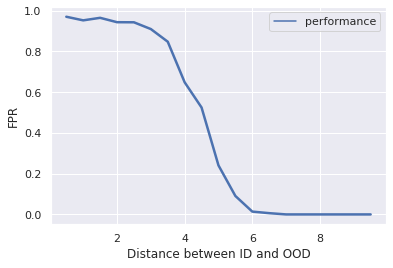

In [19]:
ax=sns.lineplot(data=dt, linewidth=2.5)
ax.set(xlabel='Distance between ID and OOD', ylabel='FPR');